# Independent particles
The hopping terms are set to 0, so that only the diagonal random elements remain. Does this system produce an eigenvalue Poisson distribution anyway?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matrixensembles import BosonChainSampler, MatrixStats
from operators import BosonSystemSpec

In [9]:
sampler = BosonChainSampler(10, 1, 0, 0, 1)
stats = MatrixStats(sampler=sampler)
stats.collect(n_realizations=4000)

100%|██████████| 4000/4000 [00:07<00:00, 539.39it/s]


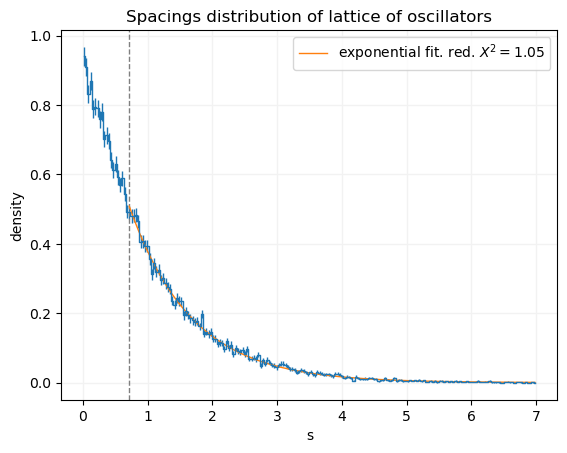

In [13]:
from utils import poissonweights
from lmfit import Model

expo = lambda x, A, D: A*np.exp(-x / D)
mod_expo = Model(expo)

s = stats.s()
heights, borders = np.histogram(s.flatten(), bins=200, range=(0,7))
# fit with an exponential
norm = np.sum(heights) * np.diff(borders)[0]
heights = heights / norm
weights = poissonweights(heights, norm=norm)
centers = borders[:-1] + np.diff(borders) / 2
starti = int(len(centers) * .1)
x, y, w = centers[starti:], heights[starti:], weights[starti:]
res_expo = mod_expo.fit(y, x=x, A=1, D=1, weights=w)

plt.xlabel(r"s")
plt.ylabel("density")
# plt.ylim(0, 0.85)

# plt.plot(centers, wignerdyson(centers, 0), label="Wigner-Dyson")
plt.errorbar(
    centers,
    heights,
    yerr = 1/weights,
    marker = '.',
    markersize = 0,
    drawstyle = 'steps-mid'
)
plt.axvline(centers[starti], color='gray', linestyle='--')

plt.plot(centers[starti:], res_expo.best_fit, label=f"exponential fit. red. $X^2={res_expo.redchi:.2f}$")
# add a grid of very light gray color
plt.grid(color='0.95', linestyle='-', linewidth=1)
plt.legend()
plt.title("Spacings distribution of lattice of oscillators")

plt.show()
